In [1]:
import pandas as pd,numpy as np

# Plot related packages
import matplotlib.pyplot as plt,seaborn as sns; sns.set()


from sklearn.model_selection import train_test_split
from sklearn import svm

from sklearn import preprocessing #For scaling

from sklearn.preprocessing import LabelEncoder # Converting Categorical(text) to Categorical(numerical)

# PCA package
from sklearn.decomposition import PCA

from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [4]:
df= pd.read_csv("dataset_Facebook.csv",sep=';')
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [5]:
df.shape

(500, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
Page total likes                                                       500 non-null int64
Type                                                                   500 non-null object
Category                                                               500 non-null int64
Post Month                                                             500 non-null int64
Post Weekday                                                           500 non-null int64
Post Hour                                                              500 non-null int64
Paid                                                                   499 non-null float64
Lifetime Post Total Reach                                              500 non-null int64
Lifetime Post Total Impressions                                        500 non-null int64
Lifetime Engaged Users                                                 500 non-nul

In [8]:
df.isna().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [42]:
df.fillna(value=0,axis=1,inplace=True)

In [43]:
df.isna().sum()

Page total likes                                                       0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   0
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page                       0
Lifetime People who have liked your Page and engage

In [46]:
df.corr()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,Type
Page total likes,1.000000,-0.091142,0.941192,-0.005401,-0.143807,0.008503,-0.083245,-0.102540,-0.111922,-0.149129,-0.128240,-0.096109,-0.060516,0.033699,0.031891,0.052305,-0.008959,0.045231,0.212267
Category,-0.091142,1.000000,-0.127690,-0.053239,-0.107383,-0.022640,-0.142073,-0.094368,0.003392,-0.031172,-0.149443,-0.047803,-0.104456,0.021569,0.027842,0.127751,0.153630,0.127307,0.057063
Post Month,0.941192,-0.127690,1.000000,0.017050,-0.176390,-0.016592,-0.102506,-0.101616,-0.115898,-0.147083,-0.142829,-0.094624,-0.092012,0.010956,0.006174,0.024617,-0.025978,0.018362,0.192448
Post Weekday,-0.005401,-0.053239,0.017050,1.000000,0.045857,-0.001870,-0.050155,-0.033674,-0.048382,-0.029602,-0.021565,-0.046442,-0.068741,0.001144,-0.077209,-0.083234,-0.053707,-0.081049,0.019393
Post Hour,-0.143807,-0.107383,-0.176390,0.045857,1.000000,-0.068289,0.003338,0.012747,0.003879,0.012222,0.078759,0.038892,0.052412,0.038011,0.000922,-0.024556,-0.059038,-0.027421,0.034053
Paid,0.008503,-0.022640,-0.016592,-0.001870,-0.068289,1.000000,0.147080,0.062896,0.117403,0.098019,0.097831,0.003478,0.110675,0.054726,0.076162,0.111587,0.079712,0.107996,0.017812
Lifetime Post Total Reach,-0.083245,-0.142073,-0.102506,-0.050155,0.003338,0.147080,1.000000,0.694926,0.570629,0.477908,0.324362,0.322254,0.743053,0.400756,0.427155,0.545463,0.457903,0.538597,0.078498
Lifetime Post Total Impressions,-0.102540,-0.094368,-0.101616,-0.033674,0.012747,0.062896,0.694926,1.000000,0.368553,0.315201,0.226081,0.850787,0.651933,0.323843,0.316612,0.345337,0.288078,0.343358,0.048611
Lifetime Engaged Users,-0.111922,0.003392,-0.115898,-0.048382,0.003879,0.117403,0.570629,0.368553,1.000000,0.968213,0.676840,0.260346,0.612080,0.839279,0.505806,0.569922,0.532968,0.572159,0.350664
Lifetime Post Consumers,-0.149129,-0.031172,-0.147083,-0.029602,0.012222,0.098019,0.477908,0.315201,0.968213,1.000000,0.706666,0.222941,0.503847,0.813510,0.334621,0.349738,0.345317,0.354502,0.390389


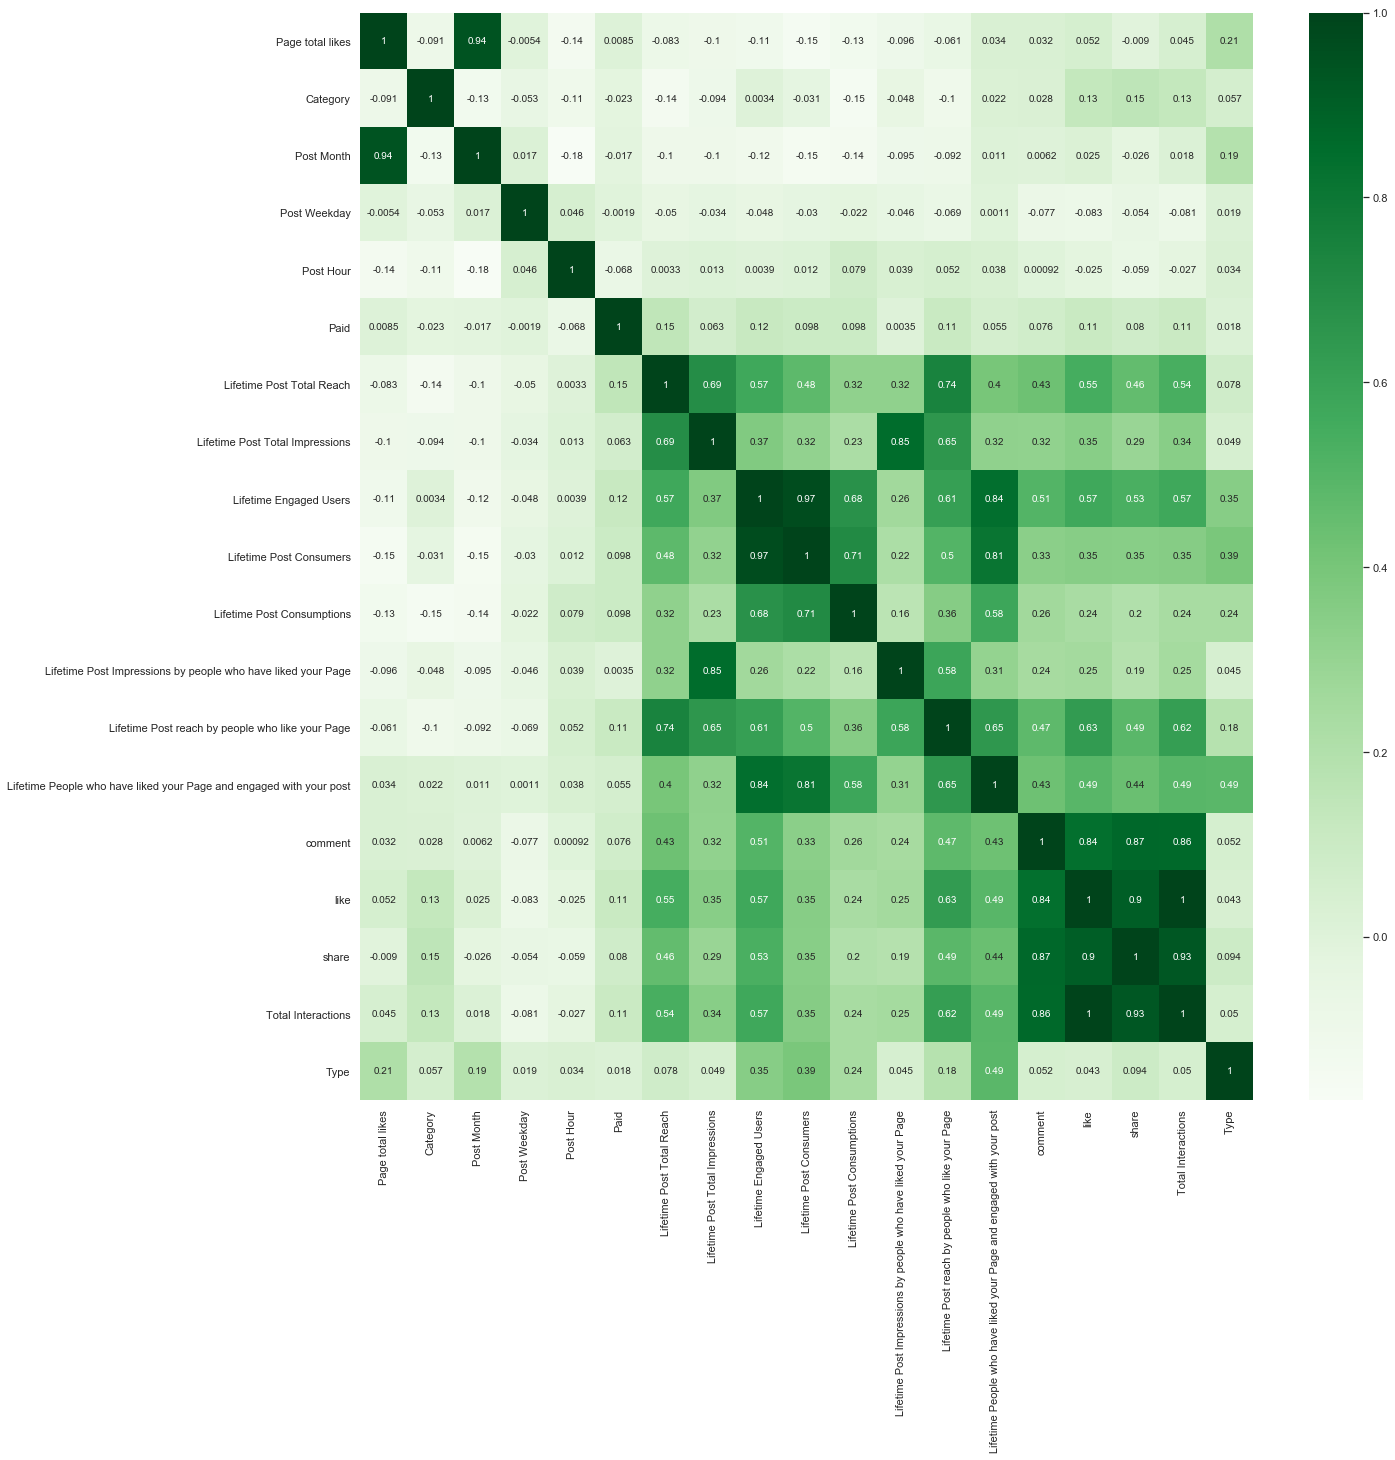

In [47]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap='Greens',annot=True)

In [48]:
df.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,Type
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278000,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.590000,27.048000,212.120000,1.074000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448462,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.172528,42.511742,380.233118,0.429993
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.000000,10.000000,71.000000,1.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000,1.000000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.250000,32.000000,228.500000,1.000000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000,3.000000


In [50]:
object_columns = list(df.select_dtypes(include="object").columns)
replace_values = {}
for i in object_columns:
    k=0
    temp=[]
    ab=list(df[i].unique())
    ab.sort()
    for j in ab:
        temp.append((j,k))
        k=k+1
    replace_values[i]=temp

replace_values    

{}

In [51]:
df_categorical=df[['Type']]

In [52]:
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,Type
0,1
1,2
2,1
3,1
4,1


In [53]:
df = df.drop(df_categorical.columns, axis=1)
df = pd.concat([df, df_categorical], axis=1)
df.head()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,Type
0,139441,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100,1
1,139441,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164,2
2,139441,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80,1
3,139441,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777,1
4,139441,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393,1


In [54]:
x=df.drop(['Total Interactions'],axis=1)
y=df['Total Interactions']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
LM=LinearRegression()

In [57]:
LM.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
ypred=LM.predict(xtest)

In [59]:
ypred_train=LM.predict(xtrain)

In [60]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [61]:
rmsE=np.sqrt(mean_squared_error(ytrain,ypred_train))
print('Root Mean squared error of train data',round(rmsE,2))
print('R square of train data',round(LM.score(xtrain,ytrain),2))

Root Mean squared error of train data 0.0
R square of train data 1.0


In [62]:
MAE=mean_absolute_error(ytest,ypred)     # metric to measure performance 
print('Mean Absolute error for test data',round(MAE,2))
rmse=np.sqrt(mean_squared_error(ytest,ypred))
print('Root Mean squared error of test data',round(rmse,2))
print('R square of test data',round(LM.score(xtest,ytest),2))

Mean Absolute error for test data 0.0
Root Mean squared error of test data 0.0
R square of test data 1.0


In [75]:
import statsmodels.api as sm
x = sm.add_constant(x) # this line means that....
model = sm.OLS(y,x).fit() # fitting the machine on the data
pred_OLS = model.predict(x) # prediction basis the learning obt

In [67]:
fittedvals = model.fittedvalues
residuals = model.resid
Rsq = model.rsquared

In [68]:
print(Rsq)

1.0


In [69]:
sse = sum(residuals**2)
sst = sum((y-y.mean())**2)

In [70]:
1-(sse/sst)

1.0

In [74]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Total Interactions   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.898e+30
Date:                Mon, 19 Aug 2019   Prob (F-statistic):               0.00
Time:                        12:30:04   Log-Likelihood:                 13109.
No. Observations:                 500   AIC:                        -2.618e+04
Df Residuals:                     481   BIC:                        -2.610e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------